## Data Loading

In [534]:
DATA_FOLDER = '../data/'
VARIABLE_FOLDER = '../variables/'
FIGURE_FOLDER = '../reports/'

In [535]:
import numpy as np
import pandas as pd

df = pd.read_csv(DATA_FOLDER + 'processed/sentiments.csv')

In [536]:
# df[query == 'lzy7693'] = [] edit this later (remove this query)

In [537]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'net', 'topic', 'negative', 'neutral', 'positive', 'date_year'], inplace=True)

In [538]:
df['date'] = pd.to_datetime(df['date'])
# years = np.array(df['date_year'].unique(), dtype='int')

In [539]:
df.head()

,query,subreddit,type,author,content,date,upvotes,n_comments,len_text,Topic,Group,Keywords,datetime,net_t
0,semaglutide,trt,post,Zellenial,Trt works if you work it.. started 1.5 years a...,2023-03-09 18:01:51,24,77,39,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2023-03-09 18:01:51,0
1,semaglutide,trt,post,7856970,Which TRT clinics offer semaglutide?.,2023-02-19 12:22:42,1,13,5,7,1,"""semaglutide"", ""compounded"", ""compounding"", ""c...",2023-02-19 12:22:42,0
2,semaglutide,trt,post,Bud1985,Semaglutide. Anyone in here have experience ta...,2023-02-02 14:56:14,4,17,35,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2023-02-02 14:56:14,0
3,semaglutide,trt,post,Hormonesforme-com,Semaglutide is a revolutionary fat loss medica...,2022-07-30 15:05:59,2,0,523,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2022-07-30 15:05:59,0
4,semaglutide,trt,post,Hey_its_Jack,Doctors office changed criteria for 'normal le...,2023-05-11 10:38:49,10,66,154,11,3,"""pcos"", ""testosterone"", ""hair"", ""birth"", ""trt""",2023-05-11 10:38:49,-1


## Visualization Settings

In [540]:
# import matplotlib
# import matplotlib.pyplot as plt
import seaborn as sns

config = {
    'axis_label': 14,
    'tick_label': 12,
    'title': 20,
    'subplot_title': 16,
}

# Set the theme without grid
sns.set_style("white")

# Set your desired palette
my_palette = sns.color_palette("Paired")

# Set the palette for all figures
sns.set_palette(my_palette)

## Data Exploration

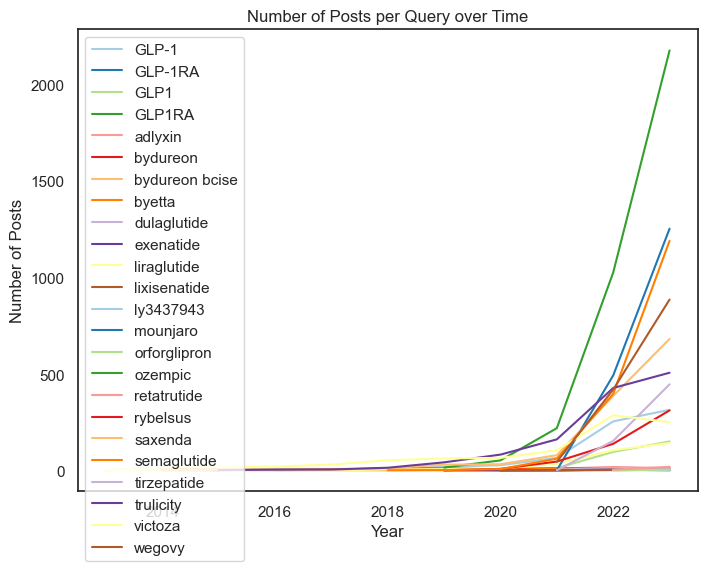

In [541]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame named 'df'
# Replace 'df' with your actual DataFrame name

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and count the number of posts
grouped = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()

# Plotting
with sns.plotting_context('notebook'):
    # sns.set_palette('autumn')
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for query in grouped.index:
        plt.plot(grouped.columns, grouped.loc[query], label=query)

    plt.xlabel('Year')
    plt.ylabel('Number of Posts')
    plt.title('Number of Posts per Query over Time')
    plt.legend()
    # plt.grid(True)
    plt.show()

In [542]:
# grouped

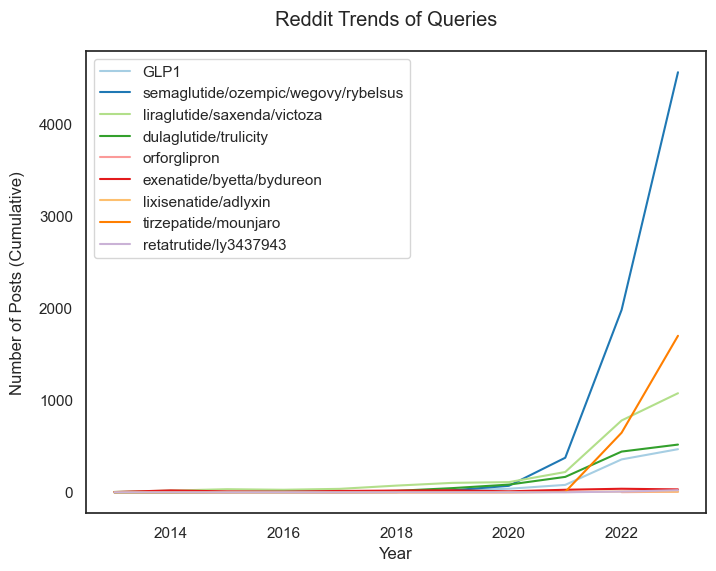

In [543]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame named 'data_frame'
# Replace 'data_frame' with your actual DataFrame name

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and count the number of posts
grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()

# Combine similar query categories
grouped_data.loc['GLP1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])

# Reorder rows
grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]

# Calculate year-to-year differences
# grouped_data = grouped_data.diff(axis=1).fillna(0)

# Plotting
with sns.plotting_context('notebook'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for query in grouped_data.index:
        line, = plt.plot(grouped_data.columns, grouped_data.loc[query], label=query)
        last_value = grouped_data.loc[query].iloc[-1]  # Get the last value of the data series
        # plt.annotate(f"{last_value}", xy=(grouped_data.columns[-1], last_value), color=line.get_color())

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Posts (Cumulative)', labelpad=10)
    fig.suptitle('Reddit Trends of Queries', y=0.95)
    plt.legend()
    # plt.grid(True)
    plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries.png', bbox_inches='tight', transparent=True)


/var/folders/jc/7ylsqgrs6qs6ygs_64spgcrc0000gn/T/ipykernel_10382/2082850818.py:37: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



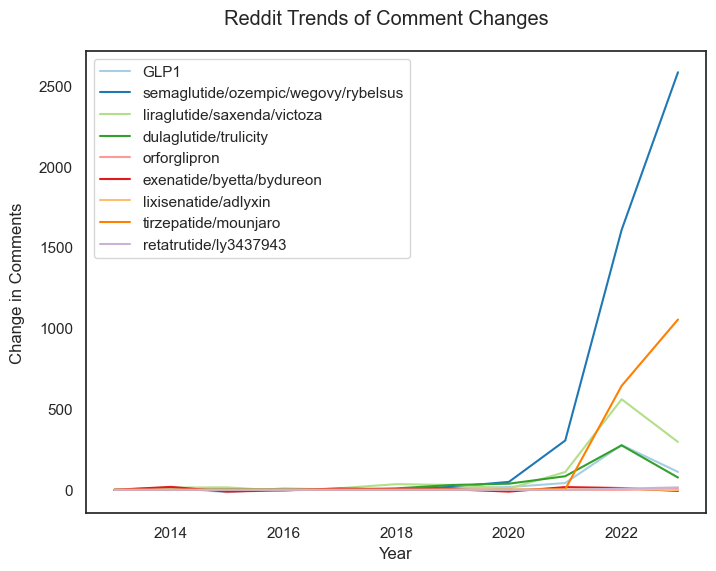

In [544]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame named 'data_frame'
# Replace 'data_frame' with your actual DataFrame name

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and sum the number of posts
grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()

# Combine similar query categories
grouped_data.loc['GLP1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])

# Reorder rows
grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]

# Calculate year-to-year differences
grouped_data_diff = grouped_data.diff(axis=1).fillna(0)

# Reset the first timepoint to 0
grouped_data_diff.iloc[:, 0] = 0

# Plotting
with sns.plotting_context('notebook'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for query in grouped_data_diff.index:
        line, = plt.plot(grouped_data_diff.columns, grouped_data_diff.loc[query], label=query)

    ax.set_xlabel('Year')
    ax.set_ylabel('Change in Comments', labelpad=10)
    fig.suptitle('Reddit Trends of Comment Changes', y=0.95)
    plt.legend()
    plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Comment_Changes.png', bbox_inches='tight', transparent=True)


In [545]:
# from dateutil.relativedelta import
#  seaborn as sns
#
# with sns.plotting_context('notebook'):
#     # sns.set_palette('autumn')
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#
#     sns.kdeplot(df['date'], linewidth=2, fill=True, cumulative=True, ax=ax)
#     ax.set_xlabel('Year', fontsize=config['axis_label'])
#
#     # Calculate the new x-axis limits with six months added to both ends
#     min_date = df['date'].min() - relativedelta(months=6-2)
#     max_date = df['date'].max() + relativedelta(months=6-2)
#
#     # Set the x-axis labels
#     ax.set_xlim(min_date, max_date)
#
#     # ax.set_xlim((df['date_time'].min(), df['date_time'].max()))
#     ax.set_ylabel('Fraction of Dataset (Cumulative)', fontsize=config['axis_label'], labelpad=10)
#
#     fig.suptitle('KDE of GLP1RA-Related Posts Over Time', fontsize=config['subplot_title'], y=0.95)
#
#     plt.savefig(FIGURE_FOLDER + 'figures/GLP1RA-Related Posts Over Time.svg', bbox_inches='tight', transparent=True)

In [546]:
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # import pandas as pd
# import datetime
#
# with sns.plotting_context('notebook'):
#     # sns.set_palette('autumn')
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#
#     # Convert "date" column to datetime
#     df['date'] = pd.to_datetime(df['date'])
#
#     # Extract year and month from "date" column
#     df['year'] = df['date'].dt.year
#     df['month'] = df['date'].dt.month
#
#     # Count the number of posts per month
#     post_count = df.groupby(['year', 'month']).size().reset_index(name='count')
#
#     # Create a date column from year and month
#     post_count['date'] = pd.to_datetime(post_count[['year', 'month']].assign(day=1))
#
#     # Sort by date
#     post_count = post_count.sort_values('date')
#
#     # Dataset: Medication Approval Dates
#     medications = {
#         "Ozempic": "12/5/17",
#         "Wegovy": "6/4/21",
#         "Rybelsus": "9/20/19",
#         "Saxenda": "12/23/14",
#         "Trulicity": "9/18/14",
#         "Mounjaro": "5/13/22",
#         "Tanzeum": "4/15/14",
#         "Victoza": "1/25/10",
#         "Bydureon": "10/20/17",
#         "Byetta": "4/28/05"
#     }
#
#     # Convert medication dates to datetime objects
#     medication_dates = [datetime.datetime.strptime(date, "%m/%d/%y") for date in medications.values()]
#
#     # Plot the line plot
#     ax.plot(post_count['date'], post_count['count'], label='Posts')
#
#     # Overlay medication dates and annotate
#     colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']
#     for date, name, color in zip(medication_dates, medications.keys(), colors):
#         ax.axvline(x=date, linestyle='--', alpha=0.5, color=color, label=name)
#
#     # Set the y-axis tick labels
#     ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#
#     # Set the plot title and labels
#     plt.title("Number of Posts Over Time with FDA Approval Dates")
#     plt.xlabel("Date")
#     plt.ylabel("Post Count")
#
#     # Rotate x-axis tick labels for better visibility
#     plt.xticks(rotation=45)
#
#     # Display the legend
#     ax.legend()
#
#     # Display the plot
#     plt.tight_layout()
#     plt.show()


In [547]:
df['date_year'] = pd.to_datetime(df['date']).dt.year.astype('int')
years = np.array(df['date_year'].unique(), dtype='int')

In [548]:
# import pandas as pd

# Assuming 'df' is your DataFrame

# Group the DataFrame by 'subreddit' and count the number of rows in each group
subreddit_counts = df.groupby('subreddit').size().reset_index(name='count')

# Display the counts per subreddit
# print(subreddit_counts)

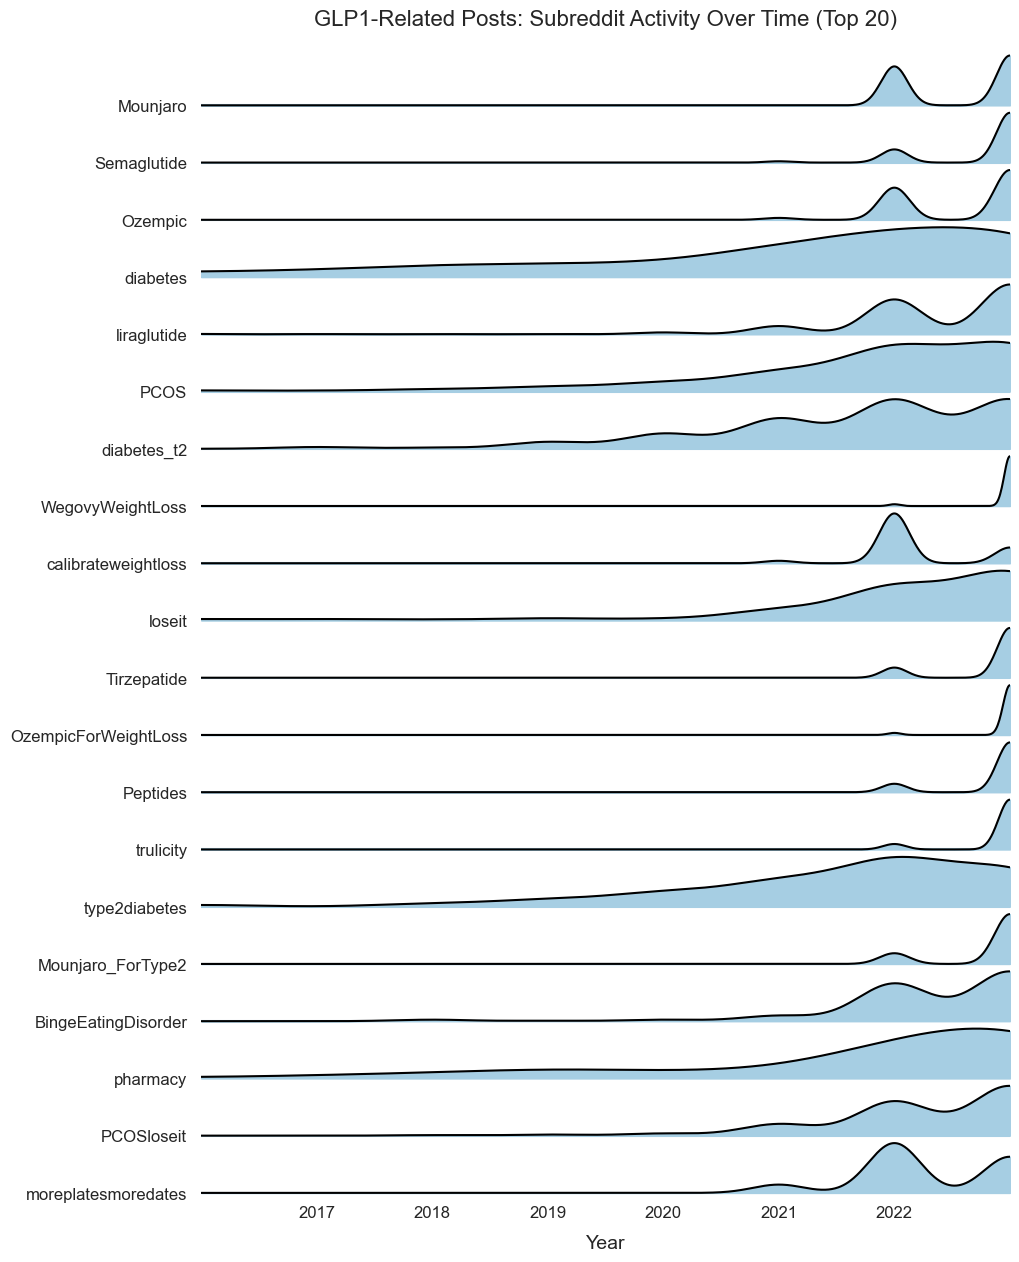

In [549]:
from joypy import joyplot
# from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'years' is defined

# Group the DataFrame by 'subreddit' and count the number of rows in each group
subreddit_counts = df.groupby('subreddit').size().reset_index(name='count')

# Sort the subreddits by count in descending order and select the top 20
top_subreddits = subreddit_counts.nlargest(20, 'count')['subreddit']

# Filter the DataFrame for the selected subreddits
filtered_df = df[(df['subreddit'].isin(top_subreddits))]

# Sort the subreddits based on the total count of posts for plotting order
filtered_df['subreddit'] = pd.Categorical(filtered_df['subreddit'], categories=top_subreddits, ordered=True)
filtered_df = filtered_df.sort_values(by='subreddit')

# Create the joyplot
fig1b, ax1b = joyplot(filtered_df.groupby('subreddit'), column='date_year',
                      ylim='own', overlap=0.05, figsize=(10, 12),
                      x_range=(2016, years.max()))  # Starting from 2016

# Set x-axis labels and font size for tick labels
ax1b[-1].set_xticklabels(ax1b[-1].get_xticklabels(), fontsize=config['tick_label'])
ax1b[-1].set_xlabel('Year', fontsize=config['axis_label'], labelpad=10)

# Set font size for y-axis tick labels
for ax1bi in ax1b:
    ax1bi.set_yticklabels(ax1bi.get_yticklabels(), fontsize=config['tick_label'])

# Set the title for the plot
ax1b[0].set_title('GLP1-Related Posts: Subreddit Activity Over Time (Top 20)', fontsize=config['subplot_title'], pad=20)

# Save the plot to a file
plt.savefig('GLP1-Related Posts: Subreddit Activity Over Time (Top 20).png', bbox_inches='tight')

# Display the plot
plt.show()


## Hierarchy Visualization

In [550]:
import pickle

with open(VARIABLE_FOLDER + "topic_model_object_save.pkl", "rb") as f:
    topic_model = pickle.load(f)

In [551]:
def create_figure_2a():

    fig2a = topic_model.visualize_hierarchy(custom_labels=True)

    fig2a = fig2a.update_layout(plot_bgcolor="white",
                                title_font={'size': 1.23 * config['subplot_title']})

    fig2a = fig2a.update_xaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})
    fig2a = fig2a.update_yaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})

    fig2a.write_image(FIGURE_FOLDER + 'figures/Hierarchical Clustering.svg')

    return fig2a

In [552]:
create_figure_2a()

## Topic Clustering

In [553]:
with open(VARIABLE_FOLDER + "c_tf_idf_embed_vis.pkl", "rb") as f:
    c_tf_idf_embed_vis = pickle.load(f)

with open(VARIABLE_FOLDER + "c_tf_idf_embed_clust.pkl", "rb") as f:
    c_tf_idf_embed_clust = pickle.load(f)

with open(VARIABLE_FOLDER + "ideal_n_clusters.pkl", "rb") as f:
    ideal_n_clusters = pickle.load(f)

In [554]:
ideal_n_clusters

3

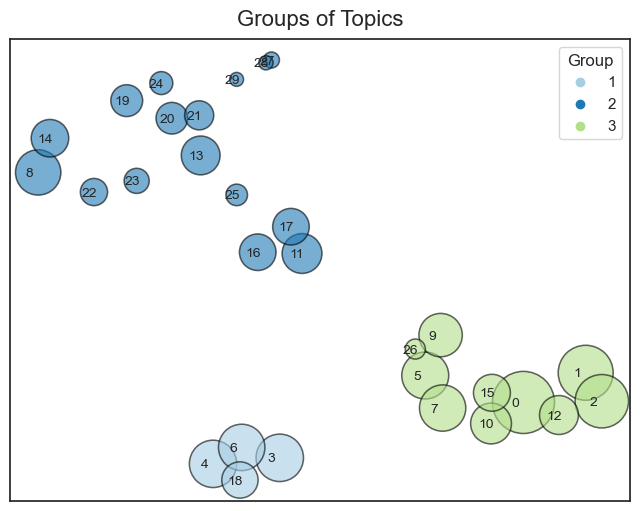

In [555]:
with sns.plotting_context('notebook'):
    # sns.set_style('white')
    plt.figure(figsize=(8,6))
    # Extract the values from the arrays-like objects
    x_values, y_values = c_tf_idf_embed_vis.T
    # print(len(x_values))
    # print(len(y_values))
    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = c_tf_idf_embed_clust
    # print(len(sizes))
    # print((len(hue_values)))

    # Create the scatter plot
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
                         sizes=(100, 2000), alpha=0.6,
                         legend=True, edgecolor='k', palette='Paired')
    h, l = ax.get_legend_handles_labels()
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    plt.legend(h[0:ideal_n_clusters], l[0:ideal_n_clusters], title='Group', loc=1)
    ax.set_title('Groups of Topics', fontsize=config['subplot_title'], pad=10)
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(FIGURE_FOLDER + 'figures/Topics Grouped by Similarity of Content.svg',  bbox_inches='tight', transparent=True)
    plt.show(ax)

In [556]:
# grouped_df = df['Group']

In [557]:
# grouped_df

In [558]:
# with sns.plotting_context('notebook'):
#
#     fig, ax = plt.subplots(figsize=(8,6))
#     ax = sns.kdeplot(data=df, x='date', hue='Group', common_norm=False, linewidth=3, ax=ax, palette='Paired')
#     ax.set_xlabel('Year')
#     # ax.set_xticks(years)
#     # ax.set_xlim((years.min() - 0.5, years.max() + 0.5))
#     ax.set_ylabel('Cumulative Density')
#     ax.set_title('Groups Over Time', fontsize=16, pad=10)
#     fig.savefig(FIGURE_FOLDER + 'figures/Groups Over Time.svg',  bbox_inches='tight', transparent=True)

In [559]:
with open(VARIABLE_FOLDER + "subreddit_by_cluster.pkl", "rb") as f:
    subreddit_by_cluster = pickle.load(f)

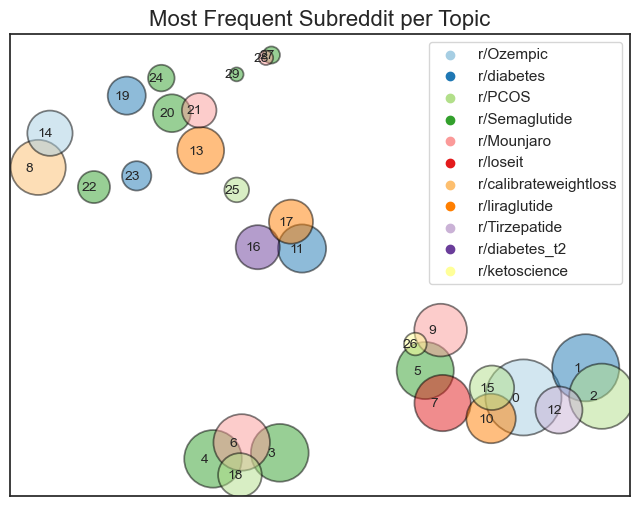

In [560]:
with sns.plotting_context('notebook'):
    # sns.set_style('ticks')
    plt.figure(figsize=(8,6))
    # Extract the values from the arrays-like objects
    x_values, y_values = c_tf_idf_embed_vis.T
    # print(len(x_values))
    # print(len(y_values))

    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    # print(len(sizes))
    hue_values = subreddit_by_cluster
    hue_values = ['r/' + hue_value for hue_value in hue_values]
    # print(len(hue_values))

    # Create the scatter plot
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
                         sizes=(100, 3000), alpha=0.5,
                         legend=True, edgecolor='k', palette='Paired')
    ax.set_title('Most Frequent Subreddit per Topic', {'fontsize': 16})
    h, l = ax.get_legend_handles_labels()
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    plt.legend(h[0:-5], l[0:-5])
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove x ticks
    plt.xticks([])
    # Remove y ticks
    plt.yticks([])
    plt.savefig(FIGURE_FOLDER + 'figures/Most Frequent Subreddit per Topic.svg',  bbox_inches='tight', transparent=True)
    plt.show(ax)

In [561]:
with open(VARIABLE_FOLDER + "unique_users_by_cluster.pkl", "rb") as f:
    unique_users_by_cluster = pickle.load(f)

## Misc

Add FDA Approval Dates

In [562]:
# import random
# import pandas as pd
# import matplotlib.pyplot as plt
# from datetime import datetime
#
# fda_dates_df = pd.read_csv('../important_dates.csv', header=None)
#
# fda_dates = fda_dates_df[1]
# fda_dates = [datetime.strptime(date, '%m/%d/%y') for date in fda_dates]
#
# num_vertical_fda_fda_dates = len(fda_dates)
# colors = [plt.cm.tab10(random.randint(0, 9)) for _ in range(num_vertical_fda_fda_dates)]
#
# for date, color in zip(fda_dates, colors):
#     plt.axvline(x=date, linestyle=':', color=color)
#
# plt.gca().xaxis_date()
#
# plt.show()

## Sentiment Analysis

In [563]:
with open(VARIABLE_FOLDER + "embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

In [564]:
(df.groupby('subreddit')['net_t']).describe().sort_values('subreddit')[['count', 'mean', 'std']].to_excel(
    FIGURE_FOLDER + 'tables/SuppTable2.xlsx')

In [565]:
(df.groupby('query')['net_t']).describe().sort_values('query')[['count', 'mean', 'std']].to_excel(
    FIGURE_FOLDER + 'tables/SuppTable3.xlsx')

/var/folders/jc/7ylsqgrs6qs6ygs_64spgcrc0000gn/T/ipykernel_10382/833480334.py:26: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



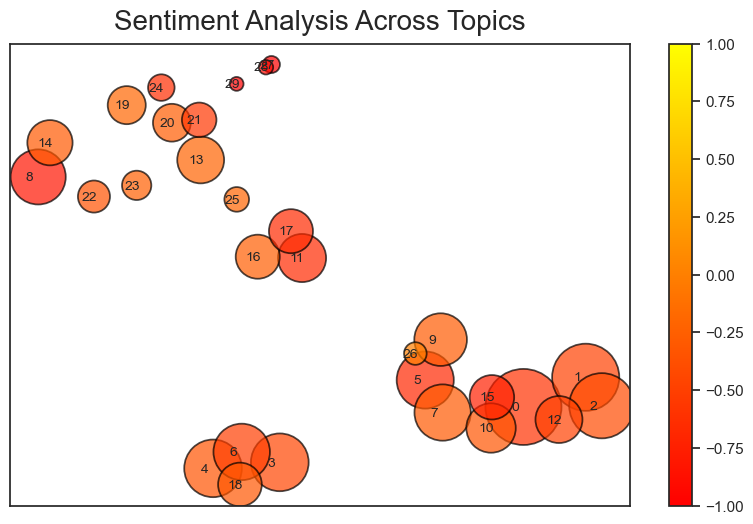

In [566]:
# sentiments = pd.read_excel('data/processed/sentiments.xlsx')

with sns.plotting_context('notebook'):
    sentiment = df.groupby('Topic')['net_t'].mean()
    # print(sentiment.min(), sentiment.max())

    norm = plt.Normalize(-1, 1)
    sm = plt.cm.ScalarMappable(cmap="autumn", norm=norm)
    sm.set_array([])

    x_values, y_values = c_tf_idf_embed_vis.T

    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = sentiment

    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, palette='autumn',
                         hue=hue_values, hue_norm=norm, sizes=(100, 3000),
                         alpha=0.7, legend=True, edgecolor='k')
    ax.set_title('Sentiment Analysis Across Topics', fontsize=config['title'], pad=10)
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)

    # ax.set_xlabel('Feature 1', fontsize=config['axis_label'])
    # ax.set_ylabel('Feature 2', fontsize=config['axis_label'])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params(labelsize=config['tick_label'], top=False, bottom=False, left=False)

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Topics.svg', bbox_inches='tight', transparent=True)

<Figure size 1000x600 with 0 Axes>

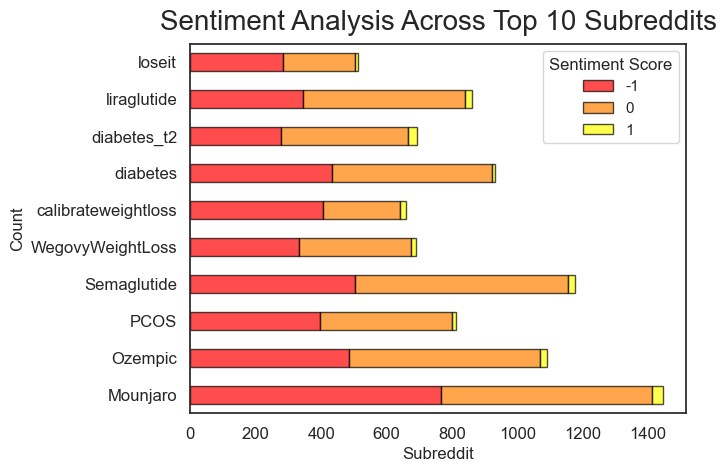

In [567]:
# from matplotlib.pyplot import autumn

with sns.plotting_context('notebook'):
    # Filter for the most prevalent subreddits
    top_subreddits = df['subreddit'].value_counts().head(10).index
    filtered_df = df[df['subreddit'].isin(top_subreddits)]

    # Group the filtered DataFrame by 'subreddit' and 'net_t'
    grouped_df = filtered_df.groupby(['subreddit', 'net_t']).size().unstack().fillna(0)

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot the grouped bar chart
    ax = grouped_df.plot(kind='barh', stacked=True, colormap='autumn',
                         alpha=0.7, legend=True, edgecolor='k')

    # Set the plot title and axes labels
    ax.set_title('Sentiment Analysis Across Top 10 Subreddits', fontsize=config['title'], pad=10)
    plt.xlabel('Subreddit')
    plt.ylabel('Count')

    ax.tick_params(labelsize=config['tick_label'])

    # Set the legend
    plt.legend(title='Sentiment Score', loc='upper right')

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Top 10 Subreddits.svg', bbox_inches='tight', transparent=True)
    plt.show()


<Figure size 1000x600 with 0 Axes>

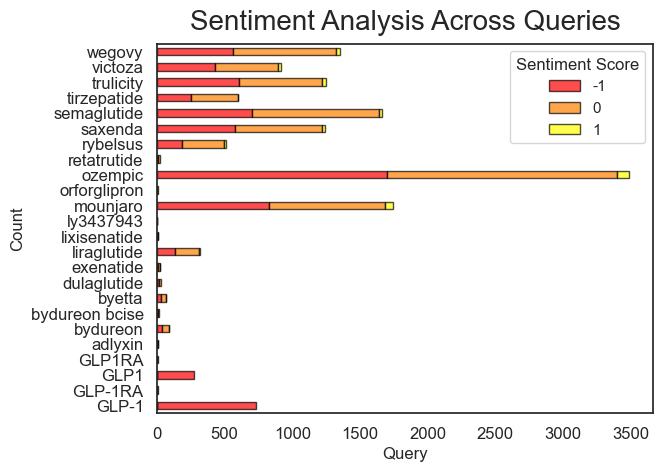

In [568]:
# from matplotlib.pyplot import autumn

with sns.plotting_context('notebook'):

    # Group the DataFrame by 'query' and 'net_t'
    grouped_df = df.groupby(['query', 'net_t']).size().unstack().fillna(0)

    # Set up the plot
    # plt.figure(figsize=(3,6))
    plt.figure(figsize=(10,6))

    # Plot the grouped bar chart
    ax = grouped_df.plot(kind='barh', stacked=True, colormap='autumn',
                         alpha=0.7, legend=True, edgecolor='k')

    # Set the plot title and axes labels
    ax.set_title('Sentiment Analysis Across Queries', fontsize=config['title'], pad=10)
    plt.xlabel('Query')
    plt.ylabel('Count')

    ax.tick_params(labelsize=config['tick_label'])

    # Set the legend
    plt.legend(title='Sentiment Score', loc='upper right')

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Queries.svg', bbox_inches='tight', transparent=True)


## Dendogram

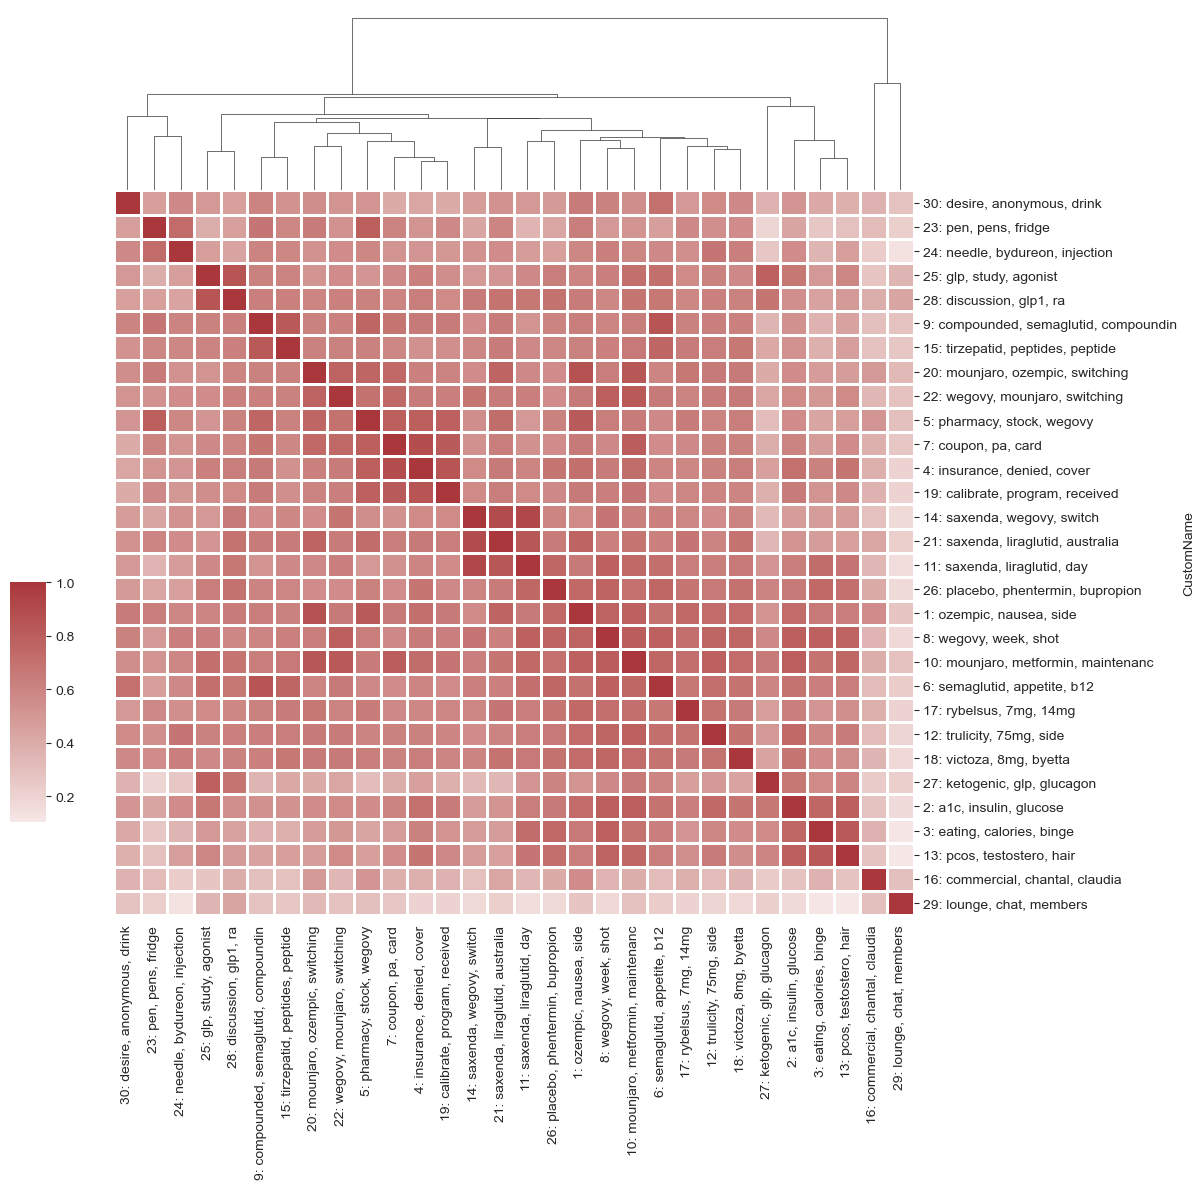

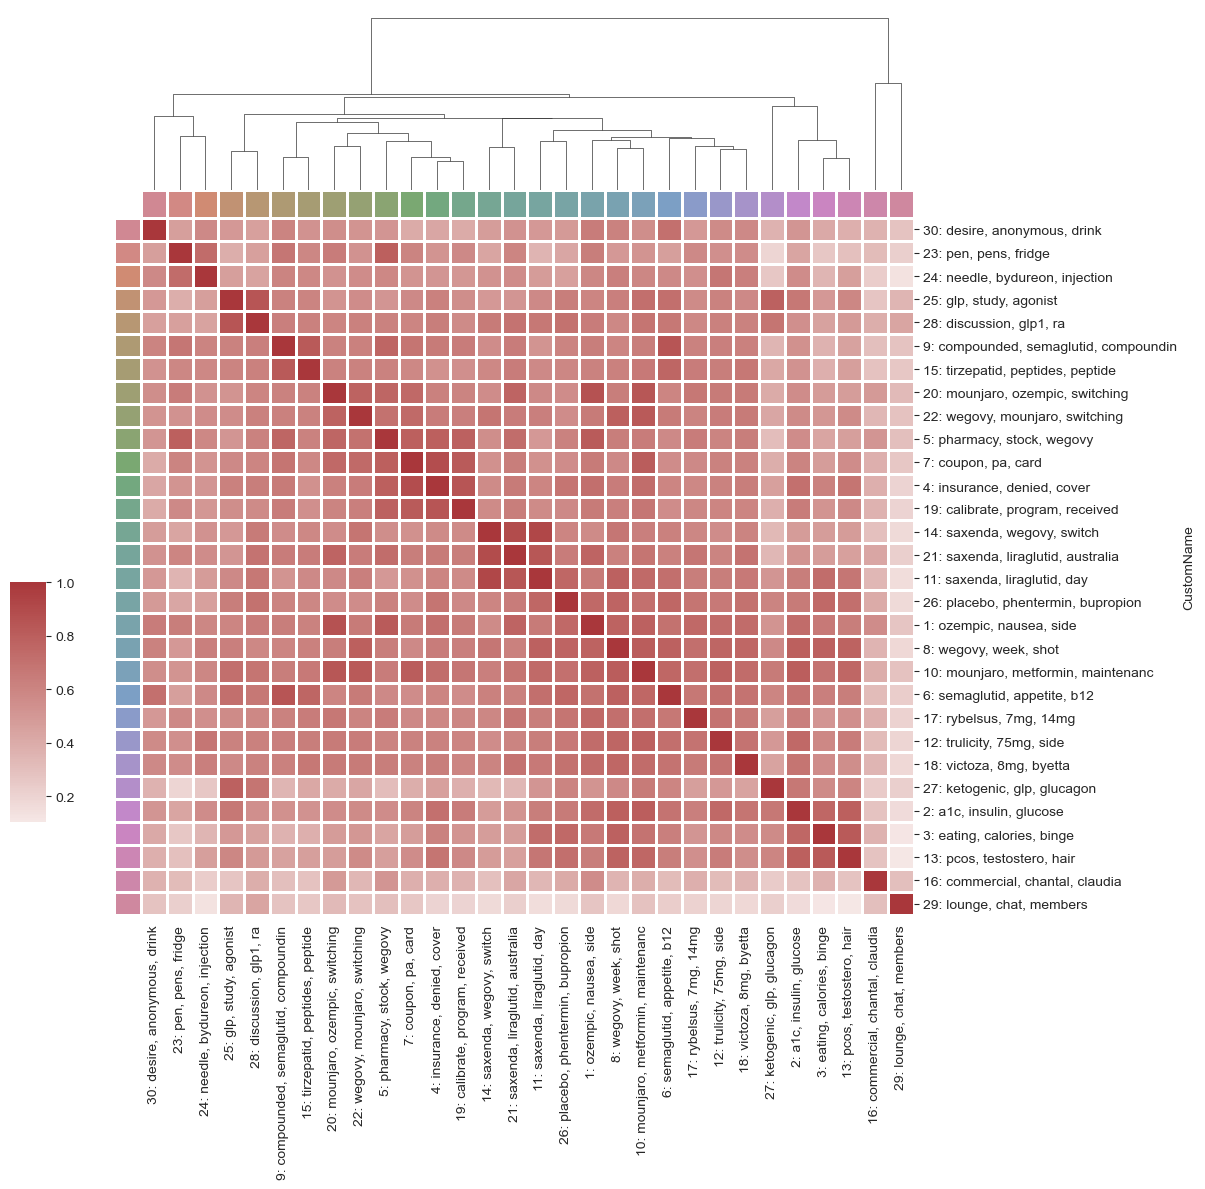

In [569]:
# Load your data from the CSV file
ddg_df = pd.read_csv(DATA_FOLDER + "processed/distance.csv", index_col='CustomName')

# Create a categorical palette
network_pal = sns.husl_palette(ddg_df.shape[0], s=.45)
network_lut = dict(zip(df.index, network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
# network_colors = ddg_df.index.map(network_lut)

# Draw the full plot
g = sns.clustermap(ddg_df, center=0, cmap="vlag",
                   # row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 12))

g.ax_row_dendrogram.remove()

x_tick_labels = [tick.get_text() for tick in g.ax_heatmap.get_xticklabels()]

network_lut = dict(zip(x_tick_labels, network_pal))
network_colors = ddg_df.index.map(network_lut)

# Draw the full plot

g = sns.clustermap(ddg_df, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 12))

g.ax_row_dendrogram.remove()

plt.show()
g.savefig(FIGURE_FOLDER + 'figures/Dendogram.svg', bbox_inches='tight', transparent=True)

In [570]:
# df.columns

In [571]:
# Assuming your DataFrame is named 'df'
df['upvotes'] = df['upvotes'].astype(int)  # Convert 'upvotes' column to integer type
upvotes_by_query = df.groupby('query')['upvotes'].sum()
# print(upvotes_by_query)

In [572]:
#upvotes on left axis and comments on right axis

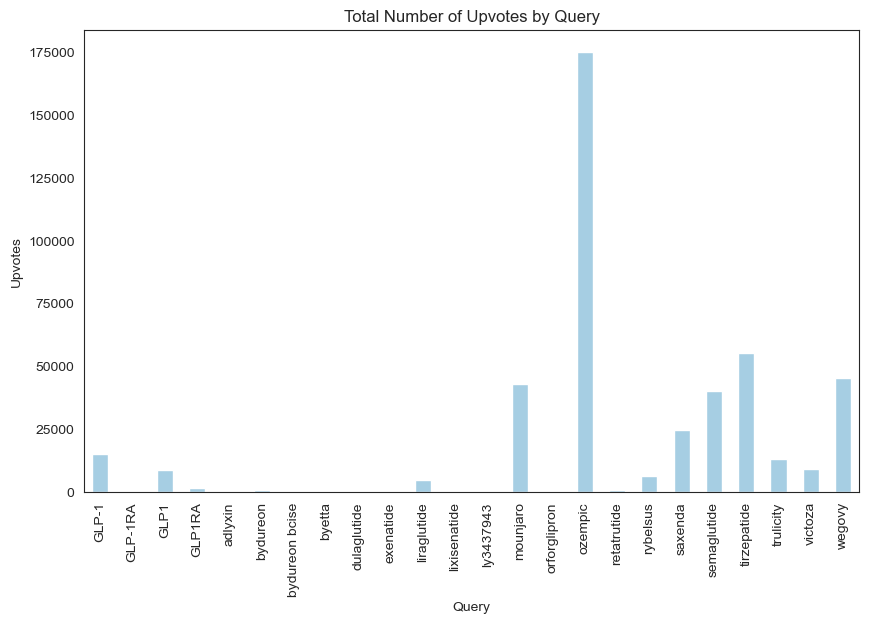

In [573]:
# import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plotting the data
upvotes_by_query.plot(kind='bar')

# Adding labels and title
plt.xlabel('Query')
plt.ylabel('Upvotes')
plt.title('Total Number of Upvotes by Query')

# Displaying the plot
plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Upvotes by Query.svg',  bbox_inches='tight', transparent=True)
plt.show()

In [574]:
# Assuming your DataFrame is named 'df'
df['n_comments'] = df['n_comments'].astype(int)  # Convert 'n_comments' column to integer type
n_comments_by_query = df.groupby('query')['n_comments'].sum()
# print(n_comments_by_query)

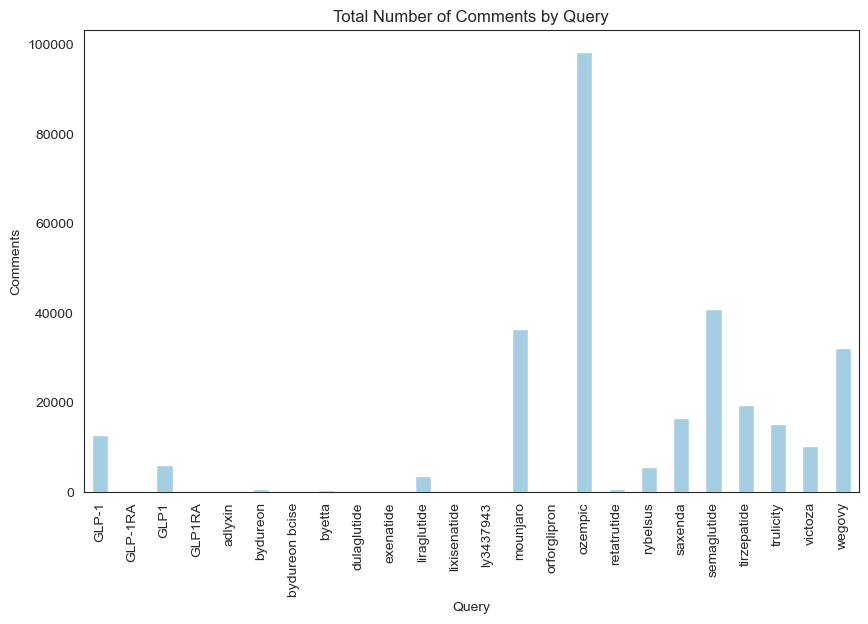

In [575]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Plotting the data
n_comments_by_query.plot(kind='bar')

# Adding labels and title
plt.xlabel('Query')
plt.ylabel('Comments')
plt.title('Total Number of Comments by Query')

# Displaying the plot
plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Comments by Query.svg',  bbox_inches='tight', transparent=True)
plt.show()

In [576]:
# query_glp1ra = df[df['query'] == 'GLP1RA']
# query_glp1ra

In [577]:
# df.columns

In [578]:
# import datetime
#
# with sns.plotting_context('notebook'):
#     # sns.set_palette('autumn')
#     fig, ax = plt.subplots(figsize=(10,6))
#
#     # Convert "date" column to datetime
#     df['date'] = pd.to_datetime(df['date'])
#
#     # Extract year and month from "date" column
#     df['year'] = df['date'].dt.year
#     df['month'] = df['date'].dt.month
#
#     # Calculate the mean sentiment by month and year
#     mean_sentiment = df.groupby(['year', 'month'])['net_t'].mean().reset_index()
#
#     # Create a date column from year and month
#     mean_sentiment['date'] = pd.to_datetime(mean_sentiment[['year', 'month']].assign(day=1))
#
#     # Sort by date
#     mean_sentiment = mean_sentiment.sort_values('date')
#
#     # Dataset: Medication Approval Dates
#     medications = {
#         "Ozempic": "12/5/17",
#         "Wegovy": "6/4/21",
#         "Rybelsus": "9/20/19",
#         "Saxenda": "12/23/14",
#         "Trulicity": "9/18/14",
#         "Mounjaro": "5/13/22",
#         "Tanzeum": "4/15/14",
#         "Victoza": "1/25/10",
#         "Bydureon": "10/20/17",
#         "Byetta": "4/28/05"
#     }
#
#     # Convert medication dates to datetime objects
#     medication_dates = [datetime.datetime.strptime(date, "%m/%d/%y") for date in medications.values()]
#
#     # Plot the line plot
#     ax.plot(mean_sentiment['date'], mean_sentiment['net_t'], label='Mean Sentiment')
#
#     # Overlay medication dates and annotate
#     colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']
#     for date, name, color in zip(medication_dates, medications.keys(), colors):
#         ax.axvline(x=date, linestyle='--', alpha=0.5, color=color, label=name)
#
#     # Set the y-axis tick labels
#     ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#
#     # Set the y-axis label for the secondary axis
#     ax2.set_ylabel('Number of Posts')
#
#     # Set the plot title and labels
#     plt.title("Overall Mean Sentiment Over Time with FDA Approval Dates")
#     plt.xlabel("Date")
#     plt.ylabel("Sentiment")
#
#     # Rotate x-axis tick labels for better visibility
#     plt.xticks(rotation=45)
#
#     # Display the legend
#     ax.legend()
#
#     # Display the plot
# #     plt.tight_layout()
#     plt.savefig(FIGURE_FOLDER + 'figures/Overall Mean Sentiment Over Time with FDA Approval Dates.svg',  bbox_inches='tight', transparent=True)
#     plt.show()


In [579]:
# df.columns

In [580]:
# subreddit_post_count = df['subreddit'].value_counts().reset_index()
# subreddit_post_count.columns = ['subreddit', 'post_count']
# subreddit_post_count = subreddit_post_count.sort_values('post_count', ascending=False)
# top_subreddits = subreddit_post_count['subreddit'].head(10)
# df_filtered = df[df['subreddit'].isin(top_subreddits)]
# sentiment_by_subreddit = df_filtered.groupby(['subreddit', 'year', 'month'])['net_t'].mean().reset_index()
# sentiment_by_subreddit['date'] = pd.to_datetime(sentiment_by_subreddit[['year', 'month']].assign(day=1))
#
# plt.figure(figsize=(10,6))
# sns.lineplot(data=sentiment_by_subreddit, x='date', y='net_t', hue='subreddit')
# plt.xlabel('Date')
# plt.ylabel('Sentiment (Net)')
# plt.title('Mean Sentiment by Top 10 Subreddits Over Time')
# plt.xticks(rotation=45)
# plt.legend(title='Subreddit')
# plt.savefig(FIGURE_FOLDER + 'figures/Mean Sentiment by Top 10 Subreddits Over Time.svg',  bbox_inches='tight', transparent=True)
# plt.show()
#


In [581]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates
#
# # Group by subreddit, year, and month and calculate the mean sentiment
# sentiment_by_subreddit = df.groupby(['subreddit', 'year', 'month'])['net_t'].mean().reset_index()
#
# # Filter for the most prevalent subreddits
# top_subreddits = subreddit_post_count['subreddit'].head(10)
# filtered_sentiment = sentiment_by_subreddit[sentiment_by_subreddit['subreddit'].isin(top_subreddits)]
#
# # Convert year and month to datetime
# filtered_sentiment['date'] = pd.to_datetime(filtered_sentiment[['year', 'month']].assign(day=1))
#
# # Pivot the DataFrame for diverging stacked bar plot
# bar_plot_data = filtered_sentiment.pivot(index='date', columns='subreddit', values='net_t')
#
# # Create the diverging stacked bar plot
# plt.figure(figsize=(10,6))
# # sns.set_palette('RdBu_r')  # Optional: Set a specific color palette
# bar_plot_data.plot(kind='bar', stacked=True)
#
# # Set x-axis ticker to display yearly intervals
# # ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.YearLocator())
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Display only month and year
#
# # Set plot title and labels
# plt.title('Mean Sentiment by Subreddit Over Time')
# plt.xlabel('Date')
# plt.ylabel('Sum of Mean Sentiment')
#
# # Rotate x-axis tick labels for better visibility
# plt.xticks(rotation=45)
#
# # Display the legend
# plt.legend(title='Subreddit')
#
# # Display the plot
# # plt.tight_layout()
# plt.savefig(FIGURE_FOLDER + 'figures/Sum of Mean Sentiment by Top 10 Subreddits Over Time.svg',  bbox_inches='tight', transparent=True)
# plt.show()


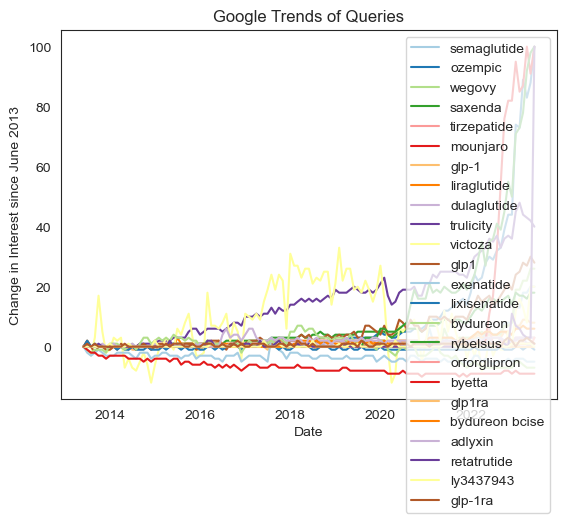

In [582]:
df = pd.read_csv('../multiTimeline.csv', header=0)
df['Month'] = pd.to_datetime(df['Month'])
df.replace('<1', 0.01, inplace=True)
for column in df.columns:
    if column == 'Month':
        continue
    df[column] = df[column].astype(int)

# Select columns excluding the first column
columns_to_plot = df.columns[1:]

# Calculate the differences between each value and the first value for the selected columns
df_change_since_first = df[columns_to_plot].sub(df[columns_to_plot].iloc[0])

import matplotlib.pyplot as plt
# Create a new figure
plt.figure()

# Plot each column on the same plot
for i in df_change_since_first.columns:
    plt.plot(df['Month'], df_change_since_first[i], label=i)  # Add label to identify each line

# Add legend to the plot
plt.legend()

# Set title and labels
plt.title("Google Trends of Queries")
plt.xlabel("Date")
plt.ylabel("Change in Interest since June 2013")

# Show the plot
plt.savefig(FIGURE_FOLDER + 'figures/Change in Interest since June 2013.png',  bbox_inches='tight', transparent=True)
plt.show()

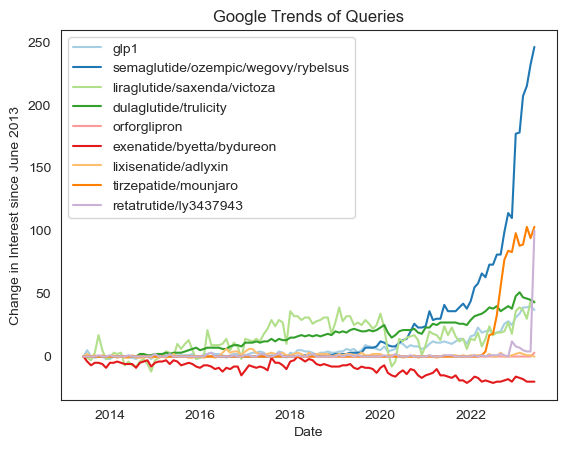

In [583]:
df = pd.read_csv('../multiTimelineEditFinal.csv', header=0)
df['Month'] = pd.to_datetime(df['Month'])
df.replace('<1', 0.01, inplace=True)
for column in df.columns:
    if column == 'Month':
        continue
    df[column] = df[column].astype(int)

# Select columns excluding the first column
columns_to_plot = df.columns[1:]

# Calculate the differences between each value and the first value for the selected columns
df_change_since_first = df[columns_to_plot].sub(df[columns_to_plot].iloc[0])

import matplotlib.pyplot as plt
# Create a new figure
plt.figure()

# Plot each column on the same plot
for i in df_change_since_first.columns:
    plt.plot(df['Month'], df_change_since_first[i], label=i)  # Add label to identify each line

# Add legend to the plot
plt.legend()

# Set title and labels
plt.title("Google Trends of Queries")
plt.xlabel("Date")
plt.ylabel("Change in Interest since June 2013")

# Show the plot
plt.savefig(FIGURE_FOLDER + 'figures/Change in Interest since June 2013 Simplified.png',  bbox_inches='tight', transparent=True)
plt.show()

In [584]:
# import pandas as pd
# import matplotlib.pyplot as plt
#
# # Load the CSV file
# df = pd.read_csv('../multiTimelineEditFinal.csv', header=0)
# df['Month'] = pd.to_datetime(df['Month'])
#
# # Replace '<1' with a small value (e.g., 0.01)
# df.replace('<1', 0.01, inplace=True)
#
# # Convert numeric columns to integers
# for column in df.columns:
#     if column == 'Month':
#         continue
#     df[column] = df[column].astype(int)
#
# # Select columns excluding the first column
# columns_to_plot = df.columns[1:]
#
# # Calculate the differences between each value and the first value for the selected columns
# df_change_since_first = df[columns_to_plot].sub(df[columns_to_plot].iloc[0])
#
# # Apply rolling mean to smoothen the data
# rolling_window = 2  # Adjust this window size according to your preference
# df_change_smoothed = df_change_since_first.rolling(rolling_window, min_periods=1).mean()
#
# # Create a new figure
# plt.figure()
#
# # Plot each column on the same plot with smoothed data
# for i in df_change_smoothed.columns:
#     plt.plot(df['Month'], df_change_smoothed[i], label=i)  # Add label to identify each line
#
# # Add legend to the plot
# plt.legend()
#
# # Set title and labels
# plt.title("Smoothed Trends in Google Search Interest since June 2013")
# plt.xlabel("Date")
# plt.ylabel("Smoothed Change in Interest since June 2013")
#
# # Show the plot or save it
# plt.savefig(FIGURE_FOLDER + 'figures/Smoothed Change in Interest since June 2013.svg', bbox_inches='tight', transparent=True)
# plt.show()
